<a href="https://colab.research.google.com/github/Pamela2710/Data-Mining/blob/main/PageRank/PageRank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo Spider Trap 0 =  10 - 15 - 7
Grupo Spider Trap 1 =  8 - 5 - 12
Grupo Spider Trap 2 =  12 - 2 - 3
Dead End 0 =  13
Dead End 1 =  1
Matriz de Adyacencia
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]
[0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
Matriz de Transicion
     0    1    2    3    4    5    6     7     8    9    10   11   12    13   14
0   0.0  0.0  0.0  0.2  0.0  0.0  0.0  0.00  0.00  

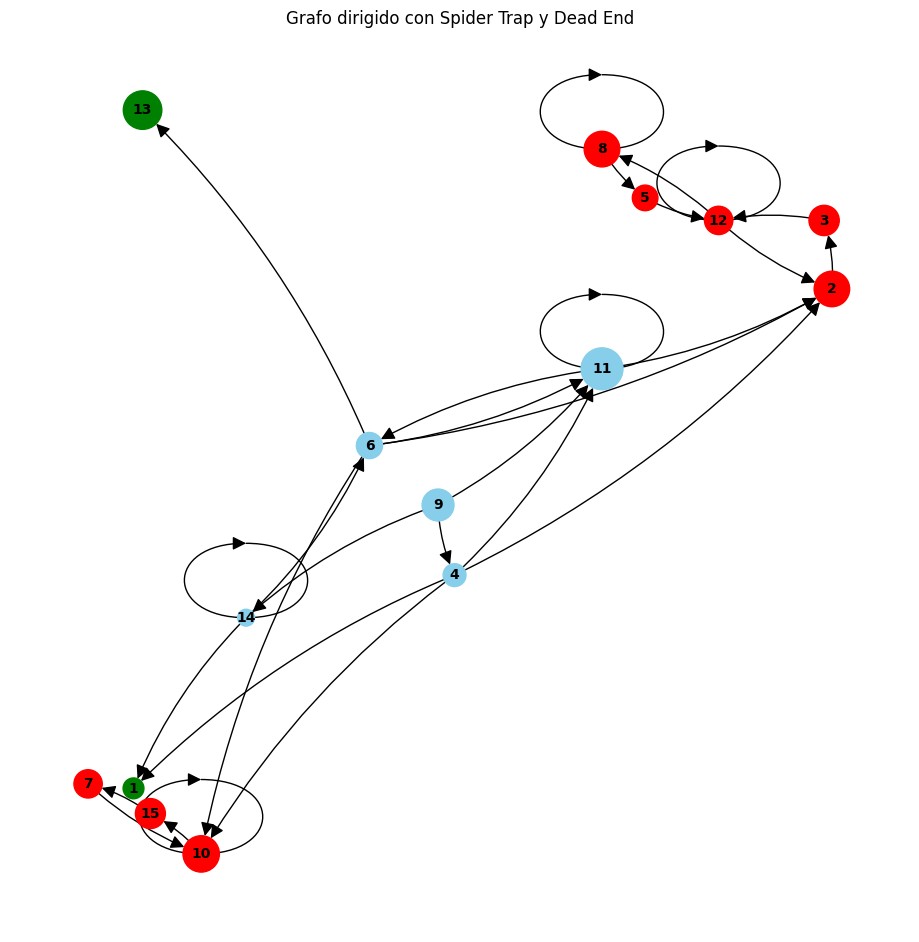

In [361]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

nodos_trampa_spider = []
nodos_trampa_dead = []

def create_directed_graph(num_nodes):
    G = nx.DiGraph()
    # Agregar nodos con pesos aleatorios
    nodos = list(range(1, num_nodes + 1))
    for node in nodos:
      weight = random.uniform(0.1, 1.0)
      G.add_node(node, weight=weight)
    return G, nodos

def add_spider_trap(G, nodos):

    for i in range(3):

      spider_trap = random.choice([n for n in nodos if n not in nodos_trampa_dead and n not in nodos_trampa_dead])
      nodos_trampa_spider.append(spider_trap)
      next_node = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead])
      nodos_trampa_spider.append(next_node)
      next_node2 = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead])
      nodos_trampa_spider.append(next_node2)

      G.add_edge(spider_trap, spider_trap)
      G.add_edge(spider_trap, next_node)
      G.add_edge(next_node, next_node2)
      G.add_edge(next_node2, spider_trap)
      print("Grupo Spider Trap", i , "= ", spider_trap ,"-", next_node ,"-", next_node2)

    return G


def add_dead_end(G, nodos):
    nodo_anterior=0
    for i_ in range(2):
      #print("nodoAnt")
      #print(nodo_anterior)
      dead_end = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead and n is not nodo_anterior])
      nodos_trampa_dead.append(dead_end)
      node = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead and n is not nodo_anterior])

      G.add_edge(node, dead_end)
      nodo_anterior=node
      print("Dead End", i_ ,"= ", dead_end)

    return G


def add_random_edges(G, nodos):
    for n in nodos:
        source = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead])
        if n not in nodos_trampa_spider and n not in nodos_trampa_dead:
            target = random.choice([n for n in nodos if n != source])
            target2 = random.choice([n for n in nodos if n != source])
            G.add_edge(n, target)
            G.add_edge(n, target2)
            G.add_edge(n, source)
    return G

def draw_graph(G):
    # Crear un diccionario de colores para los nodos
    colors = ['red' if node in nodos_trampa_spider  else 'green' if node in nodos_trampa_dead else 'skyblue' for node in G.nodes]
    weights = [G.nodes[node]['weight'] for node in G.nodes]

    plt.figure(figsize=(9, 9))
    pos = nx.spring_layout(G)
    # Escalar el tamaño de los nodos según el peso
    node_size = [weight * 1000 for weight in weights]

    nx.draw(G, pos, with_labels=True, node_size=node_size, node_color=colors, font_size=10, font_color="black", font_weight="bold", arrowsize=20, connectionstyle="arc3,rad=0.1")
    plt.title("Grafo dirigido con Spider Trap y Dead End")

def matriz_adyacencia(G):
    edges = G.edges()
    for i in range(num_nodes):
      row = []
      for j in range(num_nodes):
          row.append(0)
      matriz.append(row)

    for edge in edges:
        row = edge[0]
        col = edge[1]
        matriz[row - 1][col - 1] = 1
        matriz[col - 1][row - 1] = 1
    print("Matriz de Adyacencia")
    for i in range(1):
      for row in matriz:
        print(row)

    return matriz

def matriz_transicion(G):
    matriz_ady = np.array(matriz_adyacencia(G), dtype=float)
    # Normalizar las filas para que sumen 1
    suma_col = matriz_ady.sum(axis=0, keepdims=True)
    matriz_transicion = matriz_ady / suma_col
    # Redondear a 3 decimales
    matriz_transicion_redondeada = np.round(matriz_transicion, 2)
    return matriz_transicion_redondeada

beta = 0.8
row_num = 15
col_num = 15
matriz = []
num_nodes = 15  #nodos
G, nodos = create_directed_graph(num_nodes)

G = add_spider_trap(G, nodos)
G = add_dead_end(G, nodos)
G = add_random_edges(G, nodos)
#matriz_adyacencia(G)
matriz_transicion_resultante = matriz_transicion(G)
# Convertir la matriz a un DataFrame de pandas
df_transicion = pd.DataFrame(matriz_transicion_resultante)
print("Matriz de Transicion")
print(df_transicion)
draw_graph(G)

#REALIZAR

#Funcion Random Walker
#Funcion Power iteration
#Teletransporte
#Tener en cuenta que en cada iteracion se debe mostrar el vector rank